In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import laspy
import os
import math

# Get each histogram

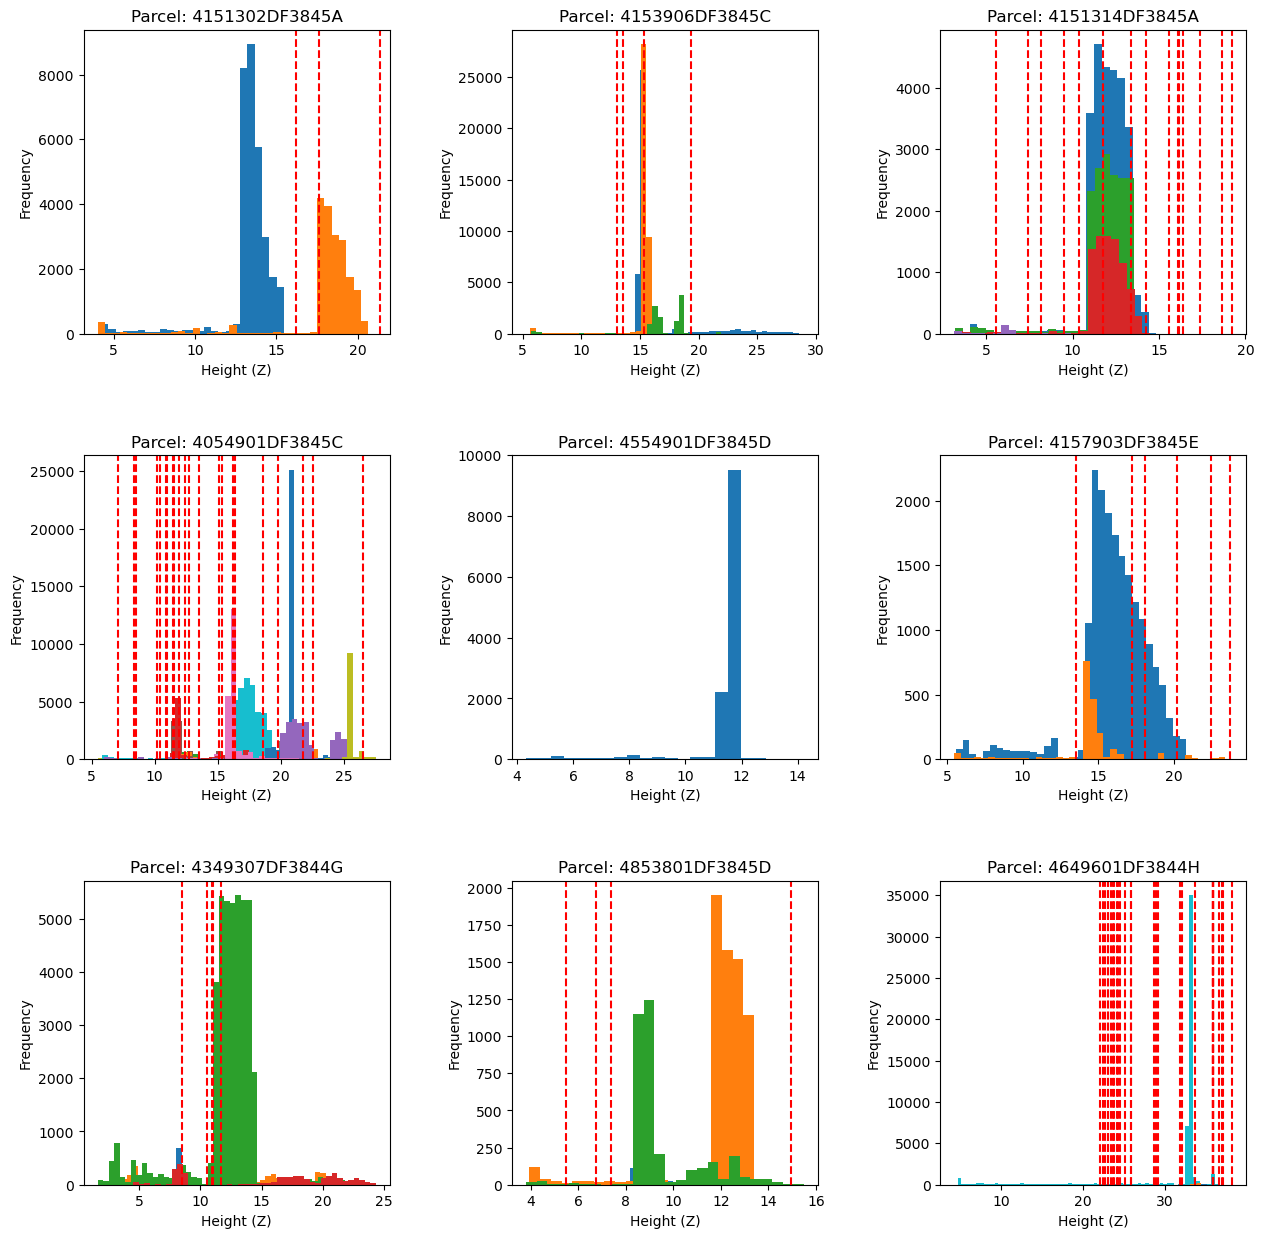

In [20]:
basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"
neighborhood = "Test_70_el Besòs i el Maresme"
parcelsFolder = basePath + "/Results/" + neighborhood + "/Parcels/"

distance_threshold = 0.45

parcels = [parcel for parcel in os.listdir(parcelsFolder) if os.path.isdir(parcelsFolder + parcel)]
num_parcels = len(parcels)

grid_size = 3
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for idx, parcel in enumerate(parcels):
    row, col = divmod(idx, grid_size)  # Determine grid position
    ax = axes[row, col]  # Get the current subplot
    ax.set_title(f"Parcel: {parcel}")

    parcelSubfolder = parcelsFolder + parcel + "/"
    for construction in [x for x in os.listdir(parcelSubfolder) if os.path.isdir(parcelSubfolder + x)]:
        constructionFolder = parcelSubfolder + construction
        lasPath = constructionFolder + "/Map files/" + construction + ".laz"
        lasDF = laspy.read(lasPath)
        Z = np.array(lasDF.z)
        Z = Z[Z.argsort()]         
        deltaZ = np.diff(Z, prepend=0)
        
        heightSplits = []
        for i in range(1, len(deltaZ)):
            if deltaZ[i] > distance_threshold:
                heightSplits.append(Z[i])

        bins = np.arange(np.min(Z), np.max(Z), distance_threshold)
        ax.hist(Z, bins)
        for split in heightSplits:
            ax.axvline(x=split, color='red', linestyle='--', linewidth=1.5)
    
    ax.set_xlabel("Height (Z)")
    ax.set_ylabel("Frequency")

plt.show()

In [12]:
np.array(Z)

array([6.148, 5.098, 4.77 , ..., 4.707, 4.798, 5.634])